In [9]:
import sys
sys.path.insert(0, '../modelling/opponent-inhibition-models')
sys.path.insert(0, '../modelling/opponent-inhibition-models/modules')
sys.path.insert(0, '../modelling/opponent-inhibition-models/data')

import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42 # Formatting for editable pdf text
matplotlib.rcParams['font.sans-serif']=['Arial']
import scipy.io as sio
from modules import data_analysis_tools as dat
from plottingtools import  *
from numpy.linalg import eigvals
from numpy.random import choice
from sklearn.linear_model import LinearRegression
from scipy.stats import pearsonr, spearmanr
from scipy.stats import gaussian_kde
import scipy.stats as stats
plt.rcParams.update({
    "text.usetex": False})

cwd = os.getcwd()
figsDir = os.sep.join([cwd,'fig_panels/'])
model_dir =  os.sep.join([cwd, '../modelling','opponent-inhibition-models'])

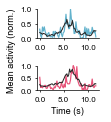

In [10]:
# Fig. 4f - activity examples

activity_E, activity_I, fit_E, fit_I = load(model_dir+'/data/appeal/randIn/n131/example_fit.npy')
dt = 1/5.3

trial_type = 1
fig = figure(figsize=(1.7,2))
ax = fig.add_subplot(111)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor='w', top=False, bottom=False, left=False, right=False)
ax1 = fig.add_subplot(2,1,1)
format_axes(ax1,'1')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'

ax1.plot(dt*arange(63), activity_E, lw=1.2, color='#62b2cc', label='Right')
ax1.plot(dt*arange(63), fit_E, lw=1, color='#242323')
ax1.set_ylim([0,1])
ax1.set_xticks([0,5,10])
ax1.set_yticks([0,0.5,1])
tight_layout()

ax2 = fig.add_subplot(2,1,2)
format_axes(ax2,'1')

#ax2.plot(dt*arange(63), activity_I, lw=1.2, color='#b50d69', label='Right')
ax2.plot(dt*arange(63), activity_I, lw=1.2, color='#e75177', label='Right')
ax2.plot(dt*arange(63), fit_I, lw=1, color='#242323')
ax2.set_xticks([0,5,10])
ax2.set_yticks([0,0.5,1])
ax2.set_xlabel('Time (s)')
ax2.spines['left'].set_bounds(0,1.)
ax2.set_ylim([0,1.2])
tight_layout()
ax.set_ylabel('Mean activity (norm.)')

plt.savefig(figsDir+'4f_example_RNN_fits.pdf',bbox_inches='tight')

c=0.1942539594632014, p=9.179876698944767e-06
c=-0.08613316521829631, p=0.0004170068299878763


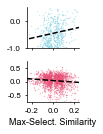

In [12]:
# # Fig 4g  - select sim E-I and I-E in one plot
s=0.1

figsize=(1.1,1.1)
fig = figure(figsize=(1.3, 2.0))

# Fig 4i top: E-to-I
ax = plt.subplot(2,1,1)
format_axes(ax)
format_axes(ax,'1')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'

p,y = load(model_dir+'/data/appeal/randIn/n131/example_scatters_IE.npy')
ax.scatter(np.array(p), y, color='#6ec9db', alpha=.5, s=s)



X = np.array(p)[:,None]
reg = LinearRegression().fit(X,y)
x_ = linspace(-.3,.3,100)
y_ = reg.intercept_ + reg.coef_ * x_

corr = pearsonr(np.array(p), y)
plot(x_, (y_), 'k--', lw=1.5, label=f'c = {corr[0]:.2f}')
print(f'c={corr[0]}, p={corr[1]}')
xlabel('Select. Similarity')
xlabel(' ')
plt.xlim([-0.25,0.25])
plt.ylim([-1,0.5])
ax.set_xticks([-0.2,0,.2])
ax.set_xticklabels([])

# Fig 4i bottom: I-to-E 
ax = plt.subplot(2,1,2)
format_axes(ax,'1')
p,y = load(model_dir+'/data/appeal/randIn/n131/example_scatters_EI.npy')
ax.scatter(np.array(p), y, color='#e85177', alpha=.5, s=s)
X = np.array(p)[:,None]
reg = LinearRegression().fit(X,y)
x_ = linspace(-.4,.4,100)
y_ = reg.intercept_ + reg.coef_ * x_
corr = spearmanr(np.array(p), np.array(y))
plot(x_, (y_), 'k--',lw=1.5,  label=f'c = {corr[0]:.2f}')
print(f'c={corr[0]}, p={corr[1]}')

xlabel('Max-Select. Similarity')

plt.xlim([-.25,.25])
plt.ylim([-.75,.75])
ax.set_xticks([-0.2,0,.2])
tight_layout()

plt.subplots_adjust(wspace=0, hspace=0.3)
plt.savefig(figsDir+'4g_scatter_weights_selectivity.pdf',bbox_inches='tight')

Number of nets = (147,), (147,)


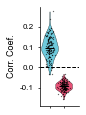

In [13]:
# Fig 4h: sel across networks
results_corr_IE, results_corr_EI = load(model_dir+'/data/appeal/randIn/n131/CorrelationsViolin_inputE.npy')

i_par = 0
color_points = ['k','k']
color_bodies = ['#6ec9db', '#e85177']

fig = figure(figsize=(1.3,1.7))
ax = fig.add_subplot(111)
format_axes(ax,'0')
ax.yaxis.set_major_formatter(FormatStrFormatter('%.1f'))
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'

positions=[1,2]
widths=[1.2,1.2]
data1 = results_corr_IE[i_par]
data2 = results_corr_EI[i_par]
data1 = data1[~isnan(data1)]
data2 = data2[~isnan(data2)]
data = [data1, data2]
parts = ax.violinplot(data, positions=positions, widths=widths, showmedians=True, showextrema=False)
for i in range(len(data)):
    for j in range(len(data[i])):
        plot([positions[i]+random.normal(0,0.15)], [data[i][j]], '.', markersize=0.5, alpha=1, color=color_points[i])

i=0
for pc in parts['bodies']:
    pc.set_facecolor(color_bodies[i])
    pc.set_edgecolor('black')
    pc.set_linewidth(0.3)
    pc.set_alpha(1)
    i+=1
parts['cmedians'].set_color('k')
parts['cmedians'].set_linewidth(1)
xticks([1,2],['E-to-I', 'I-to-E'])
xticks([1,2],[])

ax.set_ylabel('Corr. Coef.')
xlim = ax.get_xlim()

ax.set_xlim([xlim[0],xlim[1]+.4])
xlim = ax.get_xlim()

ax.plot(xlim, [0,0], '--', lw=1, color='k')
ylim = ax.get_ylim()
ax.set_ylim([ylim[0]-.01, ylim[1]])
tight_layout()


print(f'Number of nets = {data1.shape}, {data2.shape}')
plt.savefig(figsDir+'4h_violin_selectivity_across_nets.pdf',bbox_inches='tight')

In [14]:
# Setup perturbations
net_list = load(model_dir+'/data/appeal/randIn/n131/net_list.npy')

f = model_dir+'/data/appeal/randIn/n131/perturbations_131_inputE_pt2_cut.pkl'
df = pd.read_pickle(f)


n_nets = int(len(df['data'][0]))
par = df['psparse'].values
n_par = len(par)
n = len(df['data'][0][0]['R2_IE'])

R2_IE = np.nan*np.ones((n_par,n_nets,n))
R2_EI = np.nan*np.ones((n_par,n_nets,n))
dist_orig = np.nan*np.ones((n_par,n_nets,n))
dist_pert_EI = np.nan*np.ones((n_par,n_nets,n))
dist_pert_IE = np.nan*np.ones((n_par,n_nets,n))
acc_pert_EI = np.nan*np.ones((n_par,n_nets,n))
acc_pert_IE = np.nan*np.ones((n_par,n_nets,n))
D_EI = np.nan*np.ones((n_par,n_nets,n))
D_IE = np.nan*np.ones((n_par,n_nets,n))


for i_par in range(len(df)):
    print(i_par)
    n_nets_notnan = 0
    for i_net in range(n_nets):
        data = df['data'][i_par][i_net]
        if i_net not in net_list:
            continue
        n_nets_notnan += 1
        R2_IE[i_par, i_net, :] = data['R2_IE']
        R2_EI[i_par, i_net, :] = data['R2_EI']
        dist_orig[i_par, i_net, :] = data['dist_orig']
        dist_pert_EI[i_par, i_net, :] = data['dist_pert_EI']
        dist_pert_IE[i_par, i_net, :] = data['dist_pert_IE']
        D_EI[i_par, i_net, :] = data['D_EI']
        D_IE[i_par, i_net, :] = data['D_IE']

print('Number of nets = ', n_nets_notnan)

0
Number of nets =  147


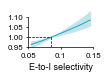

In [9]:
# Fig. 4i top: E-to-I perturbations
central_idx = 4

i_par = 0

# fig = figure(figsize=(1.8,1.8))
fig = figure(figsize=(1.6,1.2))
ax = fig.add_subplot(1,1,1)
format_axes(ax,'2','2')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'

Z = D_IE[i_par,:,:]
X = Z
condition1 = ~np.isnan(X).any(axis=1)
X = X[condition1, :]
xvals = mean(X,axis=0)

Z = dist_pert_IE[i_par,:,:]
X = Z/tile(Z[:,central_idx][:,None],(1,n))
X = X[condition1, :]

# the current code plots the 25,75 percentiles across nets, 
# alternatively you can bootstrap the median across nets --> the errorbars would be much smaller,
# hardly visible in a tiny fig)
# X = bootstrap_median(X, n_boot=100) 

P = nanpercentile(X, [25, 75], axis=0)
m = nanmedian(X, axis=0)
s1,s2 = m-P[0], P[1]-m
ax.fill_between(xvals, m-s1, m+s2, color='#c5e2e8')
ax.plot(xvals, m, '-', lw=1., markersize=4, color='#0db0d1')
# errorbar(xvals, m, yerr=[s1,s2], fmt='.-', lw=1., markersize=4, color='#0db0d1')

# ax.plot(x, median(X, axis=0), '.-', lw=1., markersize=5, color='#0db0d1')
ax.spines['left'].set_bounds(0.95,1.1)
ax.spines['bottom'].set_bounds(0.05,0.15)
ax.set_xlabel('E-to-I selectivity')
#ax.set_ylabel('Rel. dist.')

plt.xlim(0.05,0.15)
#plt.ylim(0.9,1.15)
plt.ylim(0.95,1.15)
xticks([.05, .1, 0.15], ['0.05', '0.1', '0.15'])
yticks([0.95,1,1.05, 1.1])

ylim1 = ax.get_ylim()[0]
ax.plot([ax.get_xlim()[0],xvals[central_idx]], [1,1], '--', lw=0.7, color='k')
ax.plot([xvals[central_idx],xvals[central_idx]],[ylim1,median(X, axis=0)[central_idx]], '--', lw=0.7, color='k')
tight_layout()
plt.savefig(figsDir+'4i_top_perturb_EI.pdf',bbox_inches='tight')

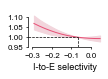

In [15]:
# Fig. 4i bottom: I-to-E perturbations
central_idx = 8

# fig = figure(figsize=(1.8,1.8))
fig = figure(figsize=(1.6,1.2))
ax = fig.add_subplot(1,1,1)
# format_axes(ax,'1','1')
matplotlib.rcParams['font.sans-serif']=['Arial']
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Arial'

Z = D_EI[i_par,:,:]
X = Z
condition1 = ~np.isnan(X).any(axis=1)
X = X[condition1, :]
xvals = nanmean(X,axis=0)

Z = dist_pert_EI[i_par,:,:]
X = Z/tile(Z[:,central_idx][:,None],(1,n))
X = X[condition1, :]

# the current code plots the 25,75 percentiles across nets, 
# alternatively you can bootstrap the median across nets --> the errorbars would be much smaller,
# hardly visible in a tiny fig)
# X = bootstrap_median(X, n_boot=100) 

P = nanpercentile(X, [25, 75], axis=0)
m = nanmedian(X, axis=0)
s1,s2 = m-P[0], P[1]-m
ax.fill_between(xvals, m-s1, m+s2, color='#f2d5dc')
ax.plot(xvals, m, '-', lw=1., markersize=4, color='#e85177')
# errorbar(xvals, m, yerr=[s1,s2], fmt='.-', lw=1., markersize=4, color='#e85177')

ax.spines['left'].set_bounds(0.95,1.1)
ax.spines['bottom'].set_bounds(-0.3,0.)

ax.set_xlabel('I-to-E selectivity')
#ax.set_ylabel('Rel. dist.')

plt.xlim(-0.32,0.05)
plt.ylim(0.95,1.15)
xticks([-.3,-.2,-.1,0])
yticks([0.95,1,1.05,1.1])

ylim1 = ax.get_ylim()[0]
ax.plot([ax.get_xlim()[0],xvals[central_idx]], [1,1], '--', lw=0.7, color='k')
ax.plot([xvals[central_idx],xvals[central_idx]],[ylim1,nanmedian(X, axis=0)[central_idx]], '--', lw=0.7, color='k')
tight_layout()
plt.savefig(figsDir+'4i_bottom_perturb_IE.pdf',bbox_inches='tight')
